In [68]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [119]:
user_rate_df = pd.read_csv('./ml-latest/ratings.csv')
movies_df = pd.read_csv('./ml-latest/movies.csv', index_col=0)
tags_df = pd.read_csv('./ml-latest/genome-tags.csv')
tag_relevance_df = pd.read_csv('./ml-latest/genome-scores.csv')

# Check data & Preprocess

In [120]:
user_rate_df.shape, movies_df.shape, tags_df.shape, tag_relevance_df.shape

((27753444, 4), (58098, 2), (1128, 2), (14862528, 3))

### Ratings.csv

In [121]:
user_rate_df

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


- drop timestamp / del movieId have not relevance

In [122]:
# drop timestamp / del movieId have not relevance 
user_rate_df = user_rate_df.drop(columns='timestamp')

user_rate_df = user_rate_df[user_rate_df['movieId'].isin(tag_relevance_df.movieId.values)]

user_rate_df

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


### Movies.csv

In [123]:
movies_df

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193876,The Great Glinka (1946),(no genres listed)
193878,Les tribulations d'une caissière (2011),Comedy
193880,Her Name Was Mumu (2016),Drama


- chage genres to each genres by one-hot encoding / drop imax

- drop data have not genres

In [124]:
# chage genres to each genres by one-hot encoding / drop imax
movies_genre_df = movies_df['genres'].str.get_dummies(sep = '|')

movies_genre_df.drop(columns='IMAX', inplace=True)

# drop data have not genres
movies_genre_df = movies_genre_df[movies_genre_df['(no genres listed)'] == 0].drop(columns='(no genres listed)')

movies_genre_df


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
193878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
193880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Tags.csv

In [126]:
tags_df

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


### Tag Relevance.csv

- to small by genre

In [309]:
tag_relevance_df.head()

tag_genre_dict = {'Action': 19, 'Adventure': 29, 'Animation': 64, 'Children': 204, 'Comedy': 230, 'Crime': 268, 'Documentary': 315, 'Drama': 323, 'Fantasy': 377, 'Film-Noir': 393, 'Horror': 522, 'Musical': 686, 'Mystery': 689, 'Romance': 863, 'Sci-Fi': 887, 'Thriller': 1025, 'War': 1096, 'Western': 1107}

tag_rel_small_df = tag_relevance_df[tag_relevance_df['tagId'].isin((pd.DataFrame([tag_genre_dict]).values))]

tag_rel_small_df

,movieId,tagId,relevance
18,1,19,0.66825
28,1,29,0.90700
63,1,64,0.98875
203,1,204,0.95450
229,1,230,0.59475
...,...,...,...
14862262,187595,863,0.26750
14862286,187595,887,0.12850
14862424,187595,1025,0.40150
14862495,187595,1096,0.63700


# Chack User

### Choose the User

- select the user with the 2nd, 3rd and 4th highest number of grade.

In [144]:
# select the user with the 2nd, 3rd and 4th highest number of grade.
user_rate_df.userId.value_counts().head()

123100    9279
117490    6998
242683    6901
212343    6195
63783     5728
Name: userId, dtype: int64

In [263]:
# user = 117490
user = 212343

- make df that [ movieId, rating ] of the grade with userId 117490 in the df

In [264]:
# make df that [ movieId, rating ] of the grade with userId 117490 in the df
user_grade_df = user_rate_df[user_rate_df['userId']==user].iloc[:,1:3]
user_grade_df.head()

,movieId,rating
20797356,1,3.5
20797357,2,1.5
20797358,3,3.0
20797359,4,1.0
20797360,5,2.5


### Filter by user

- movie filter by user

In [265]:
# movie filter by user
user_movie_df = movies_genre_df.loc[list(set(movies_genre_df.index) & set(user_grade_df.movieId))]
user_movie_df.shape

(6192, 18)

- movie filter by ~user

In [266]:
# movie filter by ~user
user_movie_noshow_df = movies_genre_df.loc[list(set(movies_genre_df.index) - set(user_grade_df.movieId))].sort_index()
user_movie_noshow_df = user_movie_noshow_df[user_movie_noshow_df.index.isin(tag_relevance_df.movieId.values)]
user_movie_noshow_df.shape

(6955, 18)

- user rate fileter by movie

In [267]:
# user rate fileter by movie
user_grade_df = user_grade_df[user_grade_df['movieId'].isin(tag_relevance_df.movieId.values)]
user_grade_df.shape

(6195, 2)

- movie relevance fileter by user

In [268]:
# movie relevance fileter by user
user_relevance_df = tag_rel_small_df[tag_rel_small_df['movieId'].isin(user_grade_df.movieId.values)]
user_relevance_df.shape

(111510, 3)

### Calcurate genre relationship

- calcurate the sum of the genre relationship values for each movie by genre

In [269]:
# calcurate the sum of the genre relationship values for each movie by genre
user_genre_sum_dict = {'Action': 0, 'Adventure': 0, 'Animation': 0, 'Children': 0, 'Comedy': 0, 'Crime': 0, 'Documentary': 0, 'Drama': 0, 'Fantasy': 0, 'Film-Noir': 0, 'Horror': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'Sci-Fi': 0, 'Thriller': 0, 'War': 0, 'Western': 0}
tag_genre_dict = {'Action': 19, 'Adventure': 29, 'Animation': 64, 'Children': 204, 'Comedy': 230, 'Crime': 268, 'Documentary': 315, 'Drama': 323, 'Fantasy': 377, 'Film-Noir': 393, 'Horror': 522, 'Musical': 686, 'Mystery': 689, 'Romance': 863, 'Sci-Fi': 887, 'Thriller': 1025, 'War': 1096, 'Western': 1107}

for movieId, rating in zip(user_grade_df.movieId, user_grade_df.rating):
    for genre_key in user_genre_sum_dict:
        user_genre_sum_dict[genre_key] += round(rating * user_relevance_df[(user_relevance_df['movieId'] == movieId) & (user_relevance_df['tagId'] == tag_genre_dict[genre_key])].relevance.values[0], 2)
user_genre_sum_dict

{'Action': 4574.39,
 'Adventure': 3651.249999999998,
 'Animation': 901.3599999999976,
 'Children': 2059.309999999963,
 'Comedy': 4035.510000000001,
 'Crime': 3797.6999999999957,
 'Documentary': 1016.5399999999869,
 'Drama': 7711.950000000016,
 'Fantasy': 2743.219999999997,
 'Film-Noir': 2468.6400000000026,
 'Horror': 2057.579999999923,
 'Musical': 1054.4299999999791,
 'Mystery': 2391.439999999969,
 'Romance': 3889.640000000007,
 'Sci-Fi': 1704.9099999999698,
 'Thriller': 4330.029999999995,
 'War': 1688.3299999999201,
 'Western': 798.039999999954}

- calcurate avg of the genre relationship values for each movie by genre

In [270]:
# calcurate avg of the genre relationship values for each movie by genre
user_genre_avg_dict = {}
for genre_key in user_genre_sum_dict:
    user_genre_avg_dict[genre_key] = round(user_genre_sum_dict[genre_key]/len(user_movie_df), 2)
user_genre_avg_dict

{'Action': 0.74,
 'Adventure': 0.59,
 'Animation': 0.15,
 'Children': 0.33,
 'Comedy': 0.65,
 'Crime': 0.61,
 'Documentary': 0.16,
 'Drama': 1.25,
 'Fantasy': 0.44,
 'Film-Noir': 0.4,
 'Horror': 0.33,
 'Musical': 0.17,
 'Mystery': 0.39,
 'Romance': 0.63,
 'Sci-Fi': 0.28,
 'Thriller': 0.7,
 'War': 0.27,
 'Western': 0.13}

# Recommend

<AxesSubplot: >

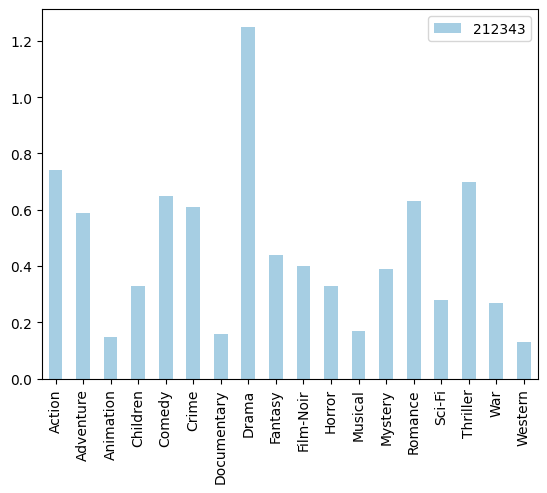

In [271]:
# dict to df
users_genre_rel_df = pd.DataFrame([user_genre_avg_dict], index=[user])
users_genre_rel_df.T.plot(kind='bar', stacked=True ,colormap='Paired')

In [272]:
# for movieId in user_movie_noshow_df.index:
#     for genre_key in tag_genre_dict:
#         if user_movie_noshow_df.loc[movieId, genre_key] == 0:
#             continue
#         user_movie_noshow_df.loc[movieId, genre_key] = user_movie_noshow_df.loc[movieId, genre_key] * tag_rel_small_df[(tag_rel_small_df['movieId'] == movieId) & (tag_rel_small_df['tagId'] == tag_genre_dict[genre_key])].relevance.values[0]
# user_movie_noshow_df

for movieId in user_movie_noshow_df.index:
    for genre_key in tag_genre_dict:
        user_movie_noshow_df.loc[movieId, genre_key] = tag_rel_small_df[(tag_rel_small_df['movieId'] == movieId) & (tag_rel_small_df['tagId'] == tag_genre_dict[genre_key])].relevance.values[0]
user_movie_noshow_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,
8,0.11100,0.64250,0.07125,0.60750,0.09225,0.07825,0.02000,0.13650,0.11275,0.08875,0.01950,0.12050,0.03050,0.11375,0.05800,0.10375,0.01550,0.01200
9,0.97775,0.15525,0.02625,0.07250,0.07025,0.04425,0.01275,0.12175,0.07900,0.08300,0.03850,0.01775,0.02725,0.13450,0.09675,0.28075,0.02425,0.01550
13,0.17750,0.37600,0.97550,0.63650,0.05200,0.03925,0.02550,0.23375,0.06825,0.08100,0.01550,0.14150,0.02875,0.18975,0.02050,0.07450,0.01475,0.01425
15,0.97800,0.97575,0.03400,0.08225,0.09975,0.03475,0.01600,0.16000,0.40850,0.08700,0.04200,0.03875,0.04500,0.46525,0.13675,0.06225,0.03175,0.02300
19,0.23175,0.27800,0.06425,0.03750,0.98500,0.10500,0.02900,0.10600,0.18425,0.10125,0.04375,0.02250,0.11400,0.10175,0.09175,0.05975,0.05550,0.02200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185435,0.31150,0.28300,0.11650,0.07925,0.59650,0.10275,0.16075,0.21325,0.29325,0.14125,0.19375,0.06175,0.08125,0.27975,0.13025,0.08050,0.03875,0.04100
185585,0.66300,0.32550,0.06650,0.04775,0.22125,0.07925,0.04150,0.22425,0.21675,0.12375,0.05925,0.06000,0.05200,0.22950,0.55150,0.13250,0.09075,0.03075
186587,0.56400,0.26425,0.10450,0.10175,0.14100,0.24550,0.23775,0.55925,0.18625,0.14225,0.77550,0.07300,0.15000,0.26875,0.56975,0.41200,0.11850,0.04900


- convolution genre_rel and noshow

In [310]:
#convolution genre_rel and noshow
user_rec_df = users_genre_rel_df.dot(user_movie_noshow_df.T)
user_rec_df.T.sort_values(by=user, ascending=False)


,212343
movieId,
185135,4.990273
131433,4.687798
26375,4.396840
183701,4.384597
134204,4.358153
...,...
60201,0.495785
2673,0.495060
82684,0.460197


# Problem

### the greater the number of genre, the higher the score

- '1st-genre: Adventure, Animation, Children, Fantasy

- 'last-genre: Fantasy

In [274]:
'1st-title: ' + movies_df.loc[98243].title, '1st-genre: ' + movies_df.loc[98243].genres, 'last-title: ' + movies_df.loc[51573].title, 'last-genre: ' + movies_df.loc[51573].genres

# '1st-genre: Adventure, Animation, Children, Fantasy

# 'last-genre: Fantasy

('1st-title: Rise of the Guardians (2012)',
 '1st-genre: Adventure|Animation|Children|Fantasy|IMAX',
 'last-title: Meshes of the Afternoon (1943)',
 'last-genre: Fantasy')

### Focus on the superficial genre

- '1st: Animation', '2nd: Animation', '3rd: Animation'

In [275]:
'1st: ' + movies_df.loc[135442].genres, '2nd: ' + movies_df.loc[163386].genres, '3rd: ' + movies_df.loc[72603].genres

# '1st: Animation', '2nd: Animation', '3rd: Animation'

('1st: Animation', '2nd: Animation', '3rd: Animation')

# Final Report

In [278]:
'1st: ' + movies_df.loc[185135].title, '2nd: ' + movies_df.loc[131433].title, '3rd: ' + movies_df.loc[26375].title

('1st: Sherlock - A Study in Pink (2010)',
 '2nd: Confession of Murder (2012)',
 '3rd: Silver Streak (1976)')

In [279]:
'1st: ' + movies_df.loc[185135].genres, '2nd: ' + movies_df.loc[131433].genres, '3rd: ' + movies_df.loc[26375].genres

('1st: Crime', '2nd: Action|Thriller', '3rd: Action|Comedy|Crime')

# Add

### use tags

In [280]:
user_rec_df.T.describe()

# weight: std = 0.55

,212343
count,6955.000000
mean,1.562591
std,0.558376
min,0.358945
25%,1.171581
50%,1.484125
75%,1.857551
max,4.990273


- keyword = 'bad'
- weight = 10

In [291]:
keyword = 'bad'
weight = 10

In [288]:
tag_rel_key_df = tag_relevance_df[tag_relevance_df['tagId'].isin([96])]
tag_rel_key_df

,movieId,tagId,relevance
95,1,96,0.07450
1223,2,96,0.08350
2351,3,96,0.10625
3479,4,96,0.11700
4607,5,96,0.13375
...,...,...,...
14856983,185435,96,0.64375
14858111,185585,96,0.04050
14859239,186587,96,0.37600
14860367,187593,96,0.07900


In [299]:
for movieId in user_rec_df:
    user_rec_df[movieId] = user_rec_df[movieId] + weight * (tag_rel_key_df[tag_rel_key_df['movieId'] == movieId].relevance.values[0])
user_rec_df.T.sort_values(by=212343, ascending=False)

,212343
movieId,
8859,10.501130
4775,10.150745
3390,10.114342
2887,9.857940
6483,9.852608
...,...
5327,0.586427
6151,0.571957
26644,0.567725


In [307]:
'1st: ' + movies_df.loc[8859].title + ' - lating: ' + str(tag_rel_key_df[(tag_rel_key_df['movieId']==8859)].relevance.values[0]), '2nd: ' + movies_df.loc[4775].title + ' - lating: ' + str(tag_rel_key_df[(tag_rel_key_df['movieId']==4775)].relevance.values[0]), '3rd: ' + movies_df.loc[3390].title +' - lating: '+ str(tag_rel_key_df[(tag_rel_key_df['movieId']==8859)].relevance.values[0])

('1st: SuperBabies: Baby Geniuses 2 (2004) - lating: 0.8265',
 '2nd: Glitter (2001) - lating: 0.83525',
 '3rd: Shanghai Surprise (1986) - lating: 0.8265')